# Comparison with data

In this second notebook we will compare the results of the `cloudy-maraston` model with SDSS and JWST data!

First let's import the relevant modules, including `synthesizer`

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from synthesizer.grid import Grid
from astropy.io import fits
import seaborn as sns
from matplotlib.lines import Line2D
from unyt import Angstrom, um
import cmasher as cmr 

# and set up plotting 

plt.rcParams['figure.dpi'] = 200
mpl.rcParams.update({'font.size': 12})
cmap = cmr.bubblegum

Now load the grid with fixed (rather than reference) ionization parameters so we can compare difference ionisation parameter models with the data

In [12]:
grid_dir = '../grids'

grid_name = 'maraston13_kroupa-max_age:7.0_cloudy-c23.01-sps-fixed-ionisation_parameter'
grid_fixed = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

## Plot Figure 10: the O32, N2 and R23 diagnostic diagrams

Make lists of line ratios from JWST from Trump+22, Birkin+23, Sanders+24, Laseter+24, Welch+24a, Welch+24b, Rogers+24:

In [4]:
# O32, Trump 2022
o3 = np.array([24.2, 62.9, 70.6, 57.4])
o2 = np.array([2.1, 5.2, 17.2, 4.2])
o32_trump = o3/o2
o32_trump_x = [7.49, 7.87, 8.10, 7.75] #ID 4590, 5144, 6355, 10612

# O32, Sanders 2024
o3 = np.array([71.3, 10.61, 109.7, 87.84, 11.46, 37.91, 19.80, 73.15, 26.69, 182.90, 22.37, 30.81, 159.30, 267.8, 28.32])
o2 = np.array([3.93, 1.18, 3.17, 5.35, 2.04, 4.08, 1.78, 11.68, 3.93, 40.55, 1.14, 1.58, 44.25, 75.80, 0.87])
o32_sanders = o3/o2
o32_sanders_x = [7.78, 7.82, 7.62, 8.04, 7.48, 7.98, 7.48, 7.72, 7.95, 8.27, 7.88, 7.46, 8.33, 8.23, 7.12] #no 1651

# O32, Laseter 2024
o3 = np.array([92.23, 459.83, 1837.91, 918.3, 574.78, 497.98, 5404.32, 222.14, 275.35, 209.70, 23.34, 19.00, 661.64])
o2 = np.array([2.24, 11.19, 213.47, 33.5, 33.64, 10.40, 995.65, 6.18, 27.10, 32.78, 0.31, 1.59, 81.96])
o32_laseter = o3/o2
o32_laseter_x = [7.03, 7.23, 8.14, 7.77, 7.58, 7.54, 7.73, 8.04, 7.34, 7.28, 7.41, 7.78, 7.27] 

# O32, Welch 2024b
o3 = np.array([6.8])
o2 = np.array([0.22])
o32_welch_b = o3/o2
o32_welch_b_x = [7.97]

# N2, Welch 2024a
n2_welch_a = [0.113]
n2_welch_a_x = [7.97]

# N2, Birkin 2023
n2_birkin = [0.34, 0.53]
n2_birkin_x = [8.53, 8.55]

# N2, Sanders 2024
NII = np.array([0.93, 3.14, 0.52, 9.44, 8.59, 9.24])
Ha = np.array([16.43, 39.27, 9.78, 96.92, 103.60, 145.10])
n2_sanders = NII/Ha
# IDs 397, 1477, 1746, 1665, 11088, 3788
n2_sanders_x = [7.98, 7.72, 7.95, 8.27, 8.33, 8.23]

# N2, Welch 2024b
n2 = np.array([0.113])
Ha = np.array([3.0])
n2_welch_b = n2 / Ha
n2_welch_b_x = [7.97]

# N2, Rogers 2024
n2 = np.array([0.112])
Ha = np.array([3.051])
n2_rogers = n2 / Ha
n2_rogers_x = [8.07]

# R23, Trump 2022
o3_1 = np.array([24.2, 62.9, 70.6, 57.4]) # 5008
o3_2 = np.array([11.2, 31.9, 36.0, 29.9]) # 4960
o2 = np.array([2.1, 5.2, 17.2, 4.2])
Hb = np.array([14.1, 20.5, 19.0, 17.5])
r23_trump = (o3_1 + o3_2 + o2) / Hb
r23_trump_x = [7.49, 7.87, 8.10, 7.75] #ID 4590, 5144, 6355, 10612

# R23, Sanders 2024
o3_1 = np.array([71.3, 10.61, 109.7, 87.84, 11.46, 37.91, 19.80, 73.15, 26.69, 182.90, 22.37, 30.81, 159.30, 267.8, 28.32]) # 5008
o3_2 = np.array([23, 3.39, 36.32, 28.22, 3.78, 11.46, 7.48, 25.98, 7.90, 59.30, 6.10, 12.53, 53.71, 89.17, 10.61])
o2 = np.array([3.93, 1.18, 3.17, 5.35, 2.04, 4.08, 1.78, 11.68, 3.93, 40.55, 1.14, 1.58, 44.25, 75.80, 0.87])
Hb = np.array([10.17, 1.52, 17, 12.85, 1.33, 5.59, 2.79, 11.64, 3.51, 26.79, 2.15, 6.03, 26.32, 39.25, 8.32])
r23_sanders = (o3_1 + o3_2 + o2) / Hb
r23_sanders_x = [7.78, 7.82, 7.62, 8.04, 7.48, 7.98, 7.48, 7.72, 7.95, 8.27, 7.88, 7.46, 8.33, 8.23, 7.12] #no 1651

# R23, Laseter 2024
o3_1 = np.array([92.23, 459.83, 1837.91, 918.3, 574.78, 497.98, 5404.32, 222.14, 275.35, 209.70, 23.34, 19.00, 661.64])
o3_2 = np.array([30.61, 154.04, 615.7, 307.63, 192.81, 165.64, 1839.14, 72.93, 91.79, 69.48, 7.56, 6.10, 222.43])
o2 = np.array([2.24, 11.19, 213.47, 33.5, 33.64, 10.40, 995.65, 6.18, 27.10, 32.78, 0.31, 1.59, 81.96])
Hb = np.array([25.29, 134.23, 238.72, 137.56, 97.98, 90.96, 796.33, 31.85, 53.20, 38.80, 3.84, 4.13, 214.04])
r23_laseter = (o3_1 + o3_2 + o2) / Hb
r23_laserer_x = [7.03, 7.23, 8.14, 7.77, 7.58, 7.54, 7.73, 8.04, 7.34, 7.28, 7.41, 7.78, 7.27] 

# R23, Welch 2024b
o3_1 = np.array([6.8])
o3_2 = np.array([2.2])
o2 = np.array([0.28])
r23_welch_b = o3_1 + o3_2 + o2
r23_welch_b_x = [7.97]

Text(0.5, 0, '12 + log(O/H)')

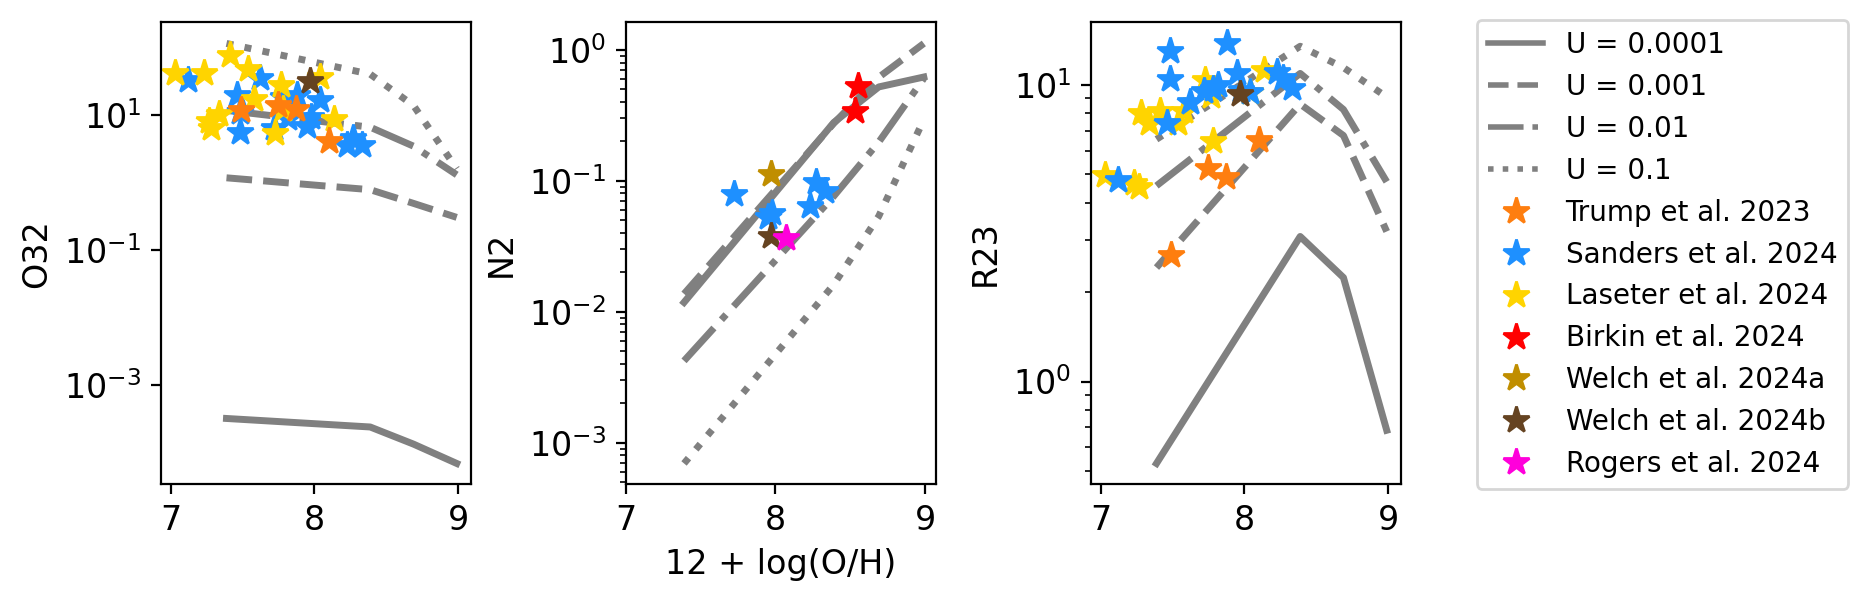

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=False)  # 1 row, 5 columns
plt.subplots_adjust(wspace=0.5)  # Increased the separation between subplots

ratio_ids = ['O32', 'N2', 'R23']

# different line style for each ionisation parameter
line_styles = {0.0001: '-',
               0.001: '--',
               0.01: '-.',
               0.1: ':',
               1.0: (0, (1,1))}

laseter_color = '#ffd400'
trump_color = '#fe7e0f'
sanders_color = '#1e90ff'
welch_color = '#c08e00'
birkin_color = '#ff0000'
welch_b_color = '#654321'
rogers_color = '#ff00db'

log10age = 6

for line, ax in enumerate(axes):

    ratio_id = ratio_ids[line]

    for param in grid_fixed.ionisation_parameter: 

        ratios = []
        for Z in grid_fixed.metallicity :
            grid_point = grid_fixed.get_grid_point((log10age,Z, param))
            lines = grid_fixed.get_lines(grid_point)
            ratios.append(lines.get_ratio(ratio_id))

        Zsun = np.log10(grid_fixed.metallicity/0.02) + 8.69
        ax.plot(Zsun, ratios, color='grey', ls=line_styles[param], lw=2.5, label=f'U = {param}')

        #ax.scatter(Zsun, ratios ,marker='o', color='grey', zorder=7)

    # Plot JWST data
    if ratio_id == 'O32':
        ax.plot(o32_sanders_x, o32_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        ax.plot(o32_laseter_x, o32_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        ax.plot(o32_trump_x, o32_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        ax.plot(o32_welch_b_x, o32_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        ax.set_ylabel('O32')

    if ratio_id == 'N2':
        ax.plot(n2_welch_a_x, n2_welch_a, ls='None', marker='*', label='Welch et al. 2024a', color=welch_color, markersize='10')
        ax.plot(n2_birkin_x, n2_birkin, ls='None', marker='*', label='Birkin et al. 2024', color=birkin_color, markersize='10')
        ax.plot(n2_sanders_x, n2_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        ax.plot(n2_welch_b_x, n2_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        ax.plot(n2_rogers_x, n2_rogers, ls='None', marker='*', label='Rogers et al. 2024', color=rogers_color, markersize='10')
        ax.set_ylabel('N2')

    if ratio_id == 'R23':
        ax.plot(r23_laserer_x, r23_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        ax.plot(r23_sanders_x, r23_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        ax.plot(r23_trump_x, r23_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        ax.plot(r23_welch_b_x, r23_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        ax.set_ylabel('R23')
    
    ax.set_yscale('log')
    ax.set_xticks([7,8,9])


legend_elements = [Line2D([0, 1], [0, 1], lw=2, linestyle='-', color='grey', label='U = 0.0001'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='--', color='grey', label='U = 0.001'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='-.', color='grey', label='U = 0.01'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle=':', color='grey', label='U = 0.1'),
                   Line2D([0], [0], marker='*', markersize=10, color=trump_color, label='Trump et al. 2023', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=sanders_color, label='Sanders et al. 2024', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=laseter_color, label='Laseter et al. 2024', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=birkin_color, label='Birkin et al. 2024', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=welch_color, label='Welch et al. 2024a', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=welch_b_color, label='Welch et al. 2024b', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=rogers_color, label='Rogers et al. 2024', linestyle='None')
]

# add to legend element for line of ls '--'

axes[2].legend(handles=legend_elements, prop={'size': 10}, loc='lower left', bbox_to_anchor=(1.2, -0.04))

axes[1].set_xlabel(r'12 + log(O/H)')

## Figure 10: compare to SDSS and JADES data on the BPT diagram

Let's open the SDSS gal_info file and get the redshifts:

In [20]:
hdul = fits.open('../data/galSpecInfo-dr8.fits')

# Accessing the data from the table within the FITS file
data = hdul[1].data

subclass_all = data['subclass'] # includes empty values

# get indices for each element in subclass that is "STARFORMING"
starforming_indices = [idx for idx, value in enumerate(subclass_all) if value == "STARFORMING"]

z_all = data['z']

z = [z_all[i] for i in starforming_indices] 

print('min z:', min(n for n in z if n>0))
print('max z:', max(z))

hdul.close()

min z: 4.6841258e-05
max z: 0.39992908


Open the SDSS gal_line file, calculate the BPT ratios:

In [22]:
hdul = fits.open('../data/galSpecLine-dr8.fits')

# Accessing the data from the table within the FITS file
data = hdul[1].data

OIII_flux_all = data['OIII_5007_flux']
H_beta_flux_all = data['H_beta_flux']
NII_flux_all = data['NII_6584_flux']
H_alpha_flux_all = data['H_alpha_flux']

OIII_flux = np.array( [OIII_flux_all[i] for i in starforming_indices] )
H_beta_flux = np.array( [H_beta_flux_all[i] for i in starforming_indices] )
NII_flux = np.array( [NII_flux_all[i] for i in starforming_indices] )
H_alpha_flux = np.array( [H_alpha_flux_all[i] for i in starforming_indices] )

print('Total number of points in data set:', len(NII_flux))

hdul.close()

y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )

# Identify indices where neither y_bpt nor x_bpt are NaN
valid_indices = ~np.isnan(y_bpt_sdss) & ~np.isnan(x_bpt_sdss)
y_bpt_clean = y_bpt_sdss[valid_indices]
x_bpt_clean = x_bpt_sdss[valid_indices]

print('Total number of BPT values:', len(y_bpt_clean), 'x', len(x_bpt_clean))


Total number of points in data set: 247423
Total BPT values: 246980 x 246980


/tmp/ipykernel_188899/2701250628.py:20: RuntimeWarning: invalid value encountered in divide
  y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
/tmp/ipykernel_188899/2701250628.py:20: RuntimeWarning: invalid value encountered in log10
  y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
/tmp/ipykernel_188899/2701250628.py:21: RuntimeWarning: divide by zero encountered in divide
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )
/tmp/ipykernel_188899/2701250628.py:21: RuntimeWarning: invalid value encountered in divide
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )
/tmp/ipykernel_188899/2701250628.py:21: RuntimeWarning: invalid value encountered in log10
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )


Now get the JADES data:

In [24]:
def extract_flux_data(file_path, valid_flags):
    # Open the FITS file
    hdul = fits.open(file_path)
    data = hdul[1].data

    # Extract necessary columns
    z = data['z_Spec']
    z_flag = data['z_Spec_flag']

    # Filter z values based on flags
    filtered_z_field = z[np.isin(z_flag, valid_flags)]

    # Extract and filter flux values based on flags
    O3_5007_flux_field = data['O3_5007_flux'][np.isin(z_flag, valid_flags)]
    HB_4861_flux_field = data['HB_4861_flux'][np.isin(z_flag, valid_flags)]
    N2_6584_flux_field = data['N2_6584_flux'][np.isin(z_flag, valid_flags)]
    HA_6563_flux_field= data['HA_6563_flux'][np.isin(z_flag, valid_flags)]

    hdul.close()

    return filtered_z_field, O3_5007_flux_field, HB_4861_flux_field, N2_6584_flux_field, HA_6563_flux_field

# Define the file paths
gs_file_path = '/home/sophienewman/data_obs/jades/jades_dr3_medium_gratings_public_gs_v1.1.fits'
gn_file_path = '/home/sophienewman/data_obs/jades/jades_dr3_medium_gratings_public_gn_v1.1.fits'

# Define the valid flags
valid_flags = ['A', 'B']

# Extract data from both files
z_gs, O3_5007_flux_gs, HB_4861_flux_gs, N2_6584_flux_gs, HA_6563_flux_gs = extract_flux_data(gs_file_path, valid_flags)
z_gn, O3_5007_flux_gn, HB_4861_flux_gn, N2_6584_flux_gn, HA_6563_flux_gn = extract_flux_data(gn_file_path, valid_flags)

# Combine the data
z = np.concatenate((z_gs, z_gn))
print('Max z:', max(z))
O3_5007_flux = np.concatenate((O3_5007_flux_gs, O3_5007_flux_gn))
HB_4861_flux = np.concatenate((HB_4861_flux_gs, HB_4861_flux_gn))
N2_6584_flux = np.concatenate((N2_6584_flux_gs, N2_6584_flux_gn))
HA_6563_flux = np.concatenate((HA_6563_flux_gs, HA_6563_flux_gn))

print('Total number of 03 5007 measurements:', len(O3_5007_flux))

y_bpt_jades = np.log10( O3_5007_flux / HB_4861_flux )
x_bpt_jades = np.log10( N2_6584_flux / HA_6563_flux )

# Identify indices where neither y_bpt nor x_bpt are NaN
valid_indices = ~np.isnan(y_bpt_jades) & ~np.isnan(x_bpt_jades)
y_bpt_clean = y_bpt_jades[valid_indices]
x_bpt_clean = x_bpt_jades[valid_indices]

print('Total number of BPT points:', len(y_bpt_clean), 'x', len(x_bpt_clean))


Max z: 12.473683
Total number of 03 5007 measurements: 1849
Total number of BPT points: 150 x 150


Plot! (It might take a while!)

/home/sophienewman/miniconda3/envs/synth/lib/python3.10/site-packages/synthesizer/grid.py:780: FutureWarning: Line objects should be created with a string id, not a list or tuple. This will be removed in a future version.
  Line(


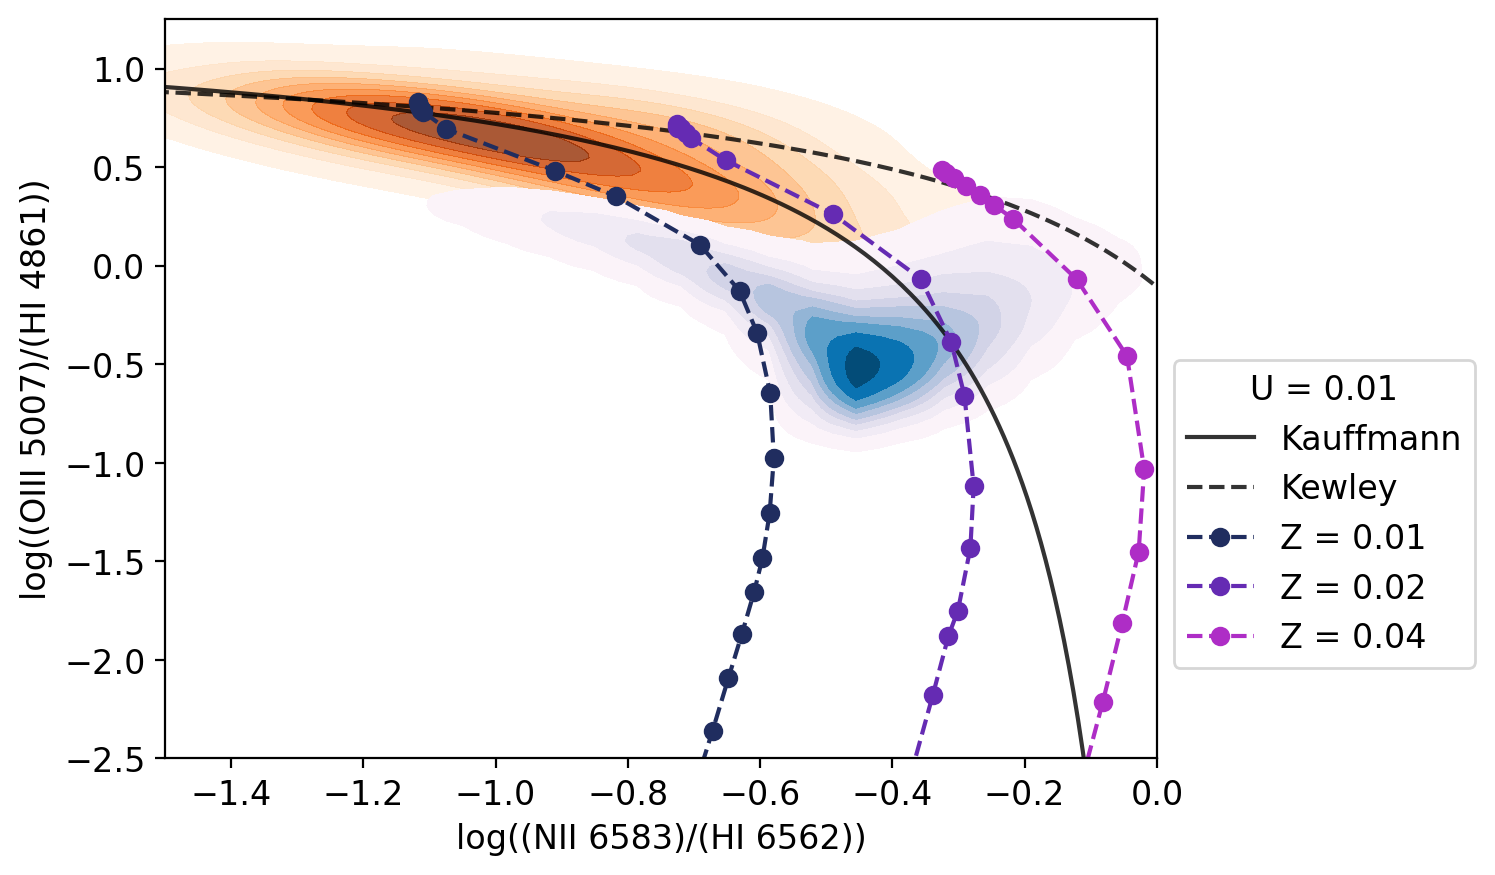

In [27]:
# plot kauffmann and kewley lines

kauffmann = []
kewley = []

xvalues = np.linspace(-3.5,0,500)
for xvalue in xvalues:
    kauffmann.append( 0.61/(xvalue - 0.05) + 1.3 )
    kewley.append( 0.61/(xvalue - 0.47) + 1.19 )

plt.plot(xvalues, kauffmann, alpha=0.8, color='black', ls='-', label='Kauffmann')
plt.plot(xvalues, kewley, alpha=0.8, color='black', ls='--', label='Kewley')


# plot data 

color_maps = ["PuBu", "Oranges", "Greens"]
scatter_colors = ["#65b8f8", "#f9bc76", "#f37581"] # red , orange, blue
plot_labels = ['SDSS', 'JADES']
zorders = [2, 1, 3]

sns.kdeplot(x=x_bpt_jades, y=y_bpt_jades, cmap=color_maps[1], fill=True, label=plot_labels[1], alpha=0.8)
sns.kdeplot(x=x_bpt_sdss, y=y_bpt_sdss, cmap=color_maps[0], fill=True, label=plot_labels[0])

# plot cloudy-maraston data 

diagram_id = 'BPT-NII'

cmap = cmr.bubblegum
colors = cmr.take_cmap_colors('cmr.bubblegum', len(grid_fixed.metallicity), cmap_range=(0.1, 0.7), return_fmt='hex')

norm = plt.Normalize(vmin=min(grid_fixed.metallicity), vmax=max(grid_fixed.metallicity))

param = 0.01

for iZ, Z in enumerate([0.01, 0.02, 0.04]):
    x = []
    y = []
    for ia, log10age in enumerate(grid_fixed.log10age):
        grid_point = grid_fixed.get_grid_point((log10age,Z, param))
        lines = grid_fixed.get_lines(grid_point)
        x_, y_ = lines.get_diagram(diagram_id)
        x.append(np.log10(x_))
        y.append(np.log10(y_))
    plt.plot(x, y, c = colors[iZ], ls='--', marker='o', label=f'Z = {Z}' ) #c=cmap(norm(log10age))

ylabel = '(OIII 5007)/(HI 4861)'
xlabel = '(NII 6583)/(HI 6562)'

plt.xlabel(f'log({xlabel})')
plt.ylabel(f'log({ylabel})')

plt.ylim(bottom=-2.5, top=1.25)
plt.xlim(left=-1.5,right=0)

plt.legend(title=f'U = {param}', loc= 'lower left', bbox_to_anchor=(1, 0.1))